### 椭圆度

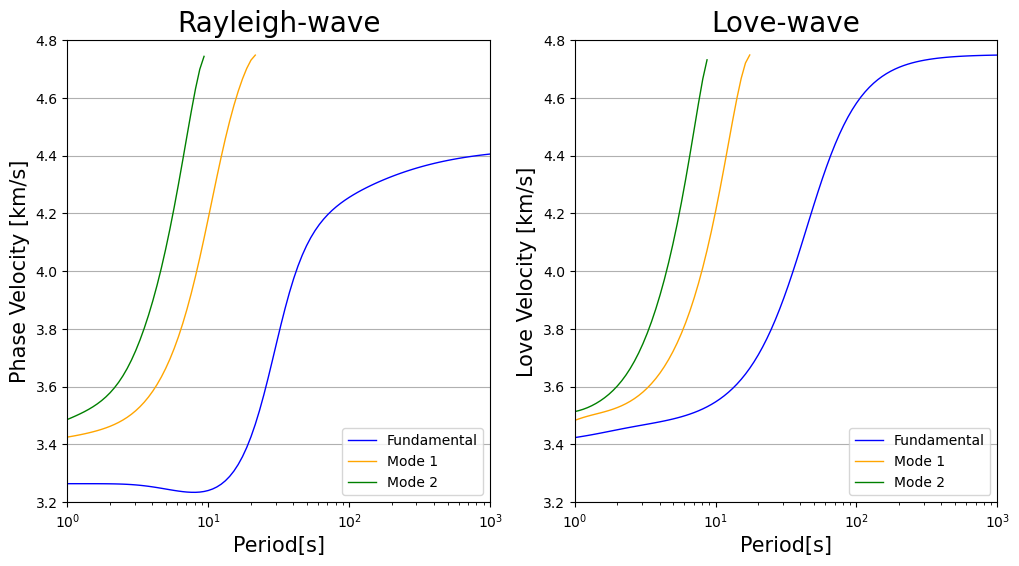

In [8]:
## 计算瑞雷波/勒夫波前三个阶次的相速度频散曲线(根据输入模型计算理论频散曲线)
import numpy as np
from disba import PhaseDispersion           #计算相速度频散
#from disba import GroupDispersion          #计算群速度频散
from disba._helpers import resample 
import matplotlib
from matplotlib import pyplot as plt

# Velocity model
# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
velocity_model = np.array([
   [10.0, 7.00, 3.50, 2.00],
   [10.0, 6.80, 3.40, 2.00],
   [10.0, 7.00, 3.50, 2.00],
   [10.0, 7.60, 3.80, 2.00],
   [10.0, 8.40, 4.20, 2.00],
   [10.0, 9.00, 4.50, 2.00],
   [10.0, 9.40, 4.70, 2.00],
   [10.0, 9.60, 4.80, 2.00],
   [10.0, 9.50, 4.75, 2.00],
])

## 0.read velocity model读取速度模型
#velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)
#print('velocity_model=',velocity_model)

## 0.1.对原始速度模型进行重采样
dz = 0.5
velocity_model = resample(velocity_model_thickness.T, velocity_model, dz)
velocity_model = np.array(velocity_model[1])
velocity_model.T[0] = dz


# Periods must be sorted starting with low periods
t = np.logspace(0.0, 3.0, 100)          #创建等比数列(周期)
#t = np.linspace(0.0, 3.0, 100)
# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves 计R/L频散曲线
# Fundamental mode corresponds to mode 0(基阶mode=0)
pd = PhaseDispersion(*velocity_model.T)
#print(pd)
#pd = GroupDispersion(*velocity_model.T)
cpr = [pd(t, mode=i, wave="rayleigh") for i in range(3)]
cpl = [pd(t, mode=i, wave="love") for i in range(3)]

#print("cpr =",cpr)
#print("mode 0 cpr=",cpr[0])
#print("mode 1 cpr=",cpr[1])
#print("mode 2 cpr =",cpr[2])	
#print("mode 2 cpr period =",cpr[2][0])			#period
#print("mode 2 cpr velocity =",cpr[2][1])		#velocity
#print("mode 2 cpr mode =",cpr[2][2])			#mode
#print("mode 2 cpr wave =",cpr[2][3])			#wave
#print("mode 2 cpr type =",cpr[2].type)			#type
# pd returns a namedtuple (period, velocity, mode, wave, type)


## 开始画图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)

## 1.Rayleigh Dispersion
ax1.set_xscale("log")
ax1.set_xlim(1,1000)
ax1.set_xlabel("Period[s]",fontsize=15)
ax1.set_ylim(3.2,4.8)
ax1.grid(axis="y")
ax1.set_ylabel("Phase Velocity [km/s]",fontsize=15)
ax1.plot(cpr[0][0], cpr[0][1], color="blue", linewidth=1, label="Fundamental")
ax1.plot(cpr[1][0], cpr[1][1], color="orange", linewidth=1, label="Mode 1")
ax1.plot(cpr[2][0], cpr[2][1], color="green", linewidth=1, label="Mode 2")
ax1.legend(loc="lower right", fontsize=10)
ax1.set_title("Rayleigh-wave", fontsize=20)

## 2.Love Dispersion
ax2.set_xscale("log")
ax2.set_xlim(1,1000)
ax2.set_xlabel("Period[s]",fontsize=15)
ax2.set_ylim(3.2,4.8)
ax2.grid(axis="y")
ax2.set_ylabel("Love Velocity [km/s]",fontsize=15)
ax2.plot(cpl[0].period, cpl[0].velocity, color="blue", linewidth=1, label="Fundamental")
ax2.plot(cpl[1].period, cpl[1].velocity, color="orange", linewidth=1, label="Mode 1")
ax2.plot(cpl[2].period, cpl[2].velocity, color="green", linewidth=1, label="Mode 2")
ax2.legend(loc="lower right",fontsize=10)
ax2.set_title("Love-wave",fontsize=20)

## 3.保存图片
#plt.subplot_tool()
#plt.show()
#plt.tight_layout()
plt.savefig('1syn_RL_phaseDisp.png',dpi=300)


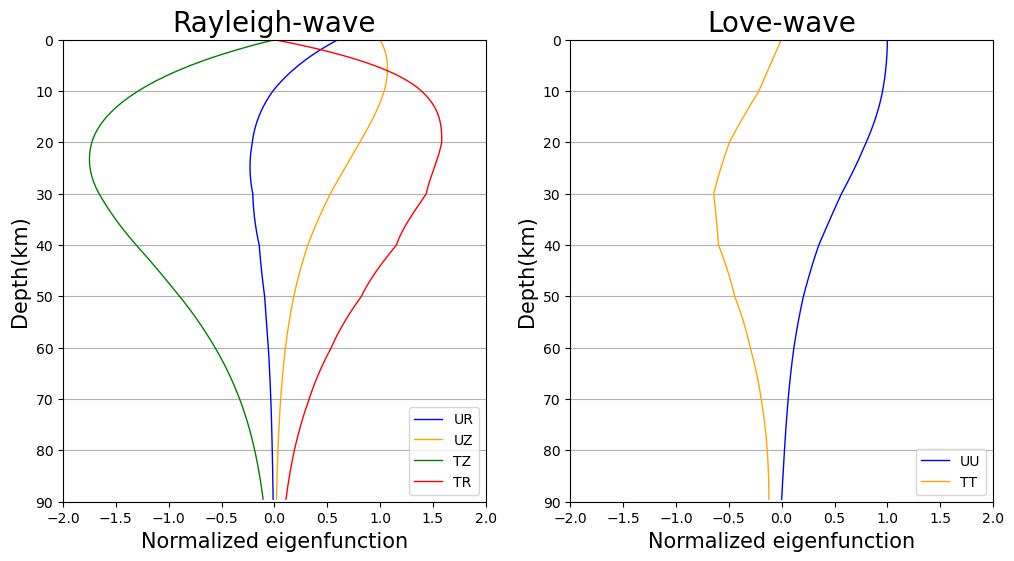

In [9]:
import numpy as np
from disba import EigenFunction
import matplotlib
from matplotlib import pyplot as plt

from disba._helpers import resample         #resample对模型进行重采样

# input velocity model
#velocity_model = np.array([
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 6.80, 3.40, 2.00],
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 7.60, 3.80, 2.00],
#   [10.0, 8.40, 4.20, 2.00],
#   [10.0, 9.00, 4.50, 2.00],
#   [10.0, 9.40, 4.70, 2.00],
#   [10.0, 9.60, 4.80, 2.00],
#   [10.0, 9.50, 4.75, 2.00],
#])
##0.读取速度模型
velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)
velocity_model_thickness=velocity_model.T[0]

## 0.1.对原始速度模型进行重采样
dz = 0.5
_, velocity_model = resample(velocity_model_thickness.T, velocity_model, dz)
velocity_model.T[0] = dz

eigf = EigenFunction(*velocity_model.T)
#eigf = EigenFunction(velocity_model)
#eigf = EigenFunction(velocity_model_thickness,velocity_model_vp,velocity_model_vs,velocity_model_rho)
eigr = eigf(20.0, mode=0, wave="rayleigh")      #基阶
eigl = eigf(20.0, mode=0, wave="love")          #基阶

# eigf returns a namedtuple
#  - (depth, ur, uz, tz, tr, period, mode) for Rayleigh-wave
#  - (depth, uu, tt, period, mode) for Love-wave

##开始画图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)

##1.Rayleigh-wave eigenfunction
ax1.set_xlim(-2.0,2.0)
ax1.set_xlabel("Normalized eigenfunction",fontsize=15)
ax1.set_ylim(90,0)
ax1.set_ylabel("Depth(km)",fontsize=15)
ax1.grid(axis="y")
ax1.set_title("Rayleigh-wave",fontsize=20)

ax1.plot(eigr.ur,eigr.depth,color="blue",linewidth=1,label="UR")
ax1.plot(eigr.uz,eigr.depth,color="orange",linewidth=1,label="UZ")
ax1.plot(eigr.tz,eigr.depth,color="green",linewidth=1,label="TZ")
ax1.plot(eigr.tr,eigr.depth,color="red",linewidth=1,label="TR")
ax1.legend(loc="lower right",fontsize=10)

##2.Love-wave eigenfunction
ax2.set_xlim(-2.0,2.0)
ax2.set_xlabel("Normalized eigenfunction",fontsize=15)
ax2.set_ylim(90,0)
ax2.set_ylabel("Depth(km)",fontsize=15)
ax2.grid(axis="y")
ax2.set_title("Love-wave",fontsize=20)


ax2.plot(eigl.uu,eigr.depth,color="blue",linewidth=1,label="UU")
ax2.plot(eigl.tt,eigr.depth,color="orange",linewidth=1,label="TT")
ax2.legend(loc="lower right",fontsize=10)

#print("eigr.uz=",eigr.uz)
#print("eigr.depth=",eigr.depth)

#plt.show()
plt.savefig('2syn_RL_eig.png',dpi=300)


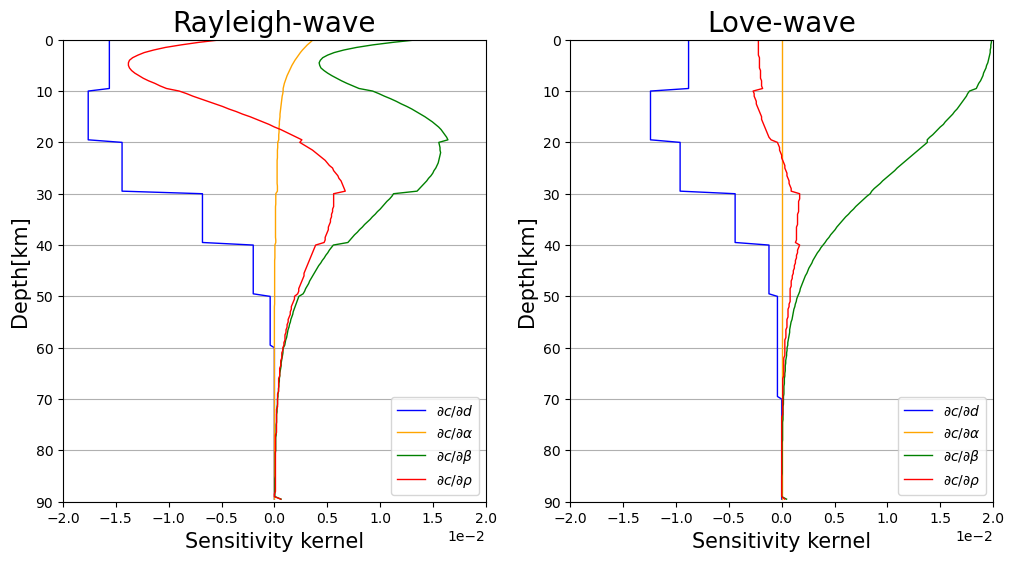

In [1]:
import numpy as np
from disba import PhaseSensitivity
import matplotlib
from matplotlib import pyplot as plt

from disba._helpers import resample

##0.读取速度模型
#velocity_model = numpy.array([
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 6.80, 3.40, 2.00],
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 7.60, 3.80, 2.00],
#   [10.0, 8.40, 4.20, 2.00],
#   [10.0, 9.00, 4.50, 2.00],
#   [10.0, 9.40, 4.70, 2.00],
#   [10.0, 9.60, 4.80, 2.00],
#   [10.0, 9.50, 4.75, 2.00],
#])
#velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)

velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)
velocity_model_thickness=velocity_model.T[0]

## 0.1.对原始速度模型进行重采样
dz = 0.5
velocity_model = resample(velocity_model_thickness.T, velocity_model, dz)
velocity_model = np.array(velocity_model[1])
velocity_model.T[0] = dz

ps = PhaseSensitivity(*velocity_model.T)
#ps = PhaseSensitivity(velocity_model_thickness,velocity_model_vp,velocity_model_vs,velocity_model_rho)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr = [ps(20.0, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
#print("skr=",skr)
skl = [ps(20.0, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)

##开始画图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)

##1.Rayleigh-wave sensitivity kernels
ax1.set_xlim(-0.02,0.02)
ax1.set_xlabel("Sensitivity kernel",fontsize=15)
ax1.xaxis.get_major_formatter().set_powerlimits((0,1))
ax1.set_ylim(90,0)
ax1.set_ylabel("Depth[km]",fontsize=15)
ax1.grid(axis="y")
ax1.set_title("Rayleigh-wave",fontsize=20)
ax1.plot(skr[0].kernel,skr[0].depth,color="blue",linewidth=1,label=r'${\partial c}/{\partial d}$')
ax1.plot(skr[1].kernel,skr[1].depth,color="orange",linewidth=1,label=r'${\partial c}/{\partial \alpha}$')
ax1.plot(skr[2].kernel,skr[2].depth,color="green",linewidth=1,label=r'${\partial c}/{\partial \beta}$')
ax1.plot(skr[3].kernel,skr[3].depth,color="red",linewidth=1,label=r'${\partial c}/{\partial \rho}$')
ax1.legend(loc="lower right",fontsize=10)

##2.Love-wave sensitivity kernels
ax2.set_xlim(-0.02,0.02)
ax2.xaxis.get_major_formatter().set_powerlimits((0,1))
ax2.set_xlabel("Sensitivity kernel",fontsize=15)
ax2.set_ylim(90,0)
ax2.set_ylabel("Depth[km]",fontsize=15)
ax2.grid(axis="y")
ax2.set_title("Love-wave",fontsize=20)

ax2.plot(skl[0].kernel,skl[0].depth,color="blue",linewidth=1,label=r'${\partial c}/{\partial d}$')
ax2.plot(skl[1].kernel,skl[1].depth,color="orange",linewidth=1,label=r'${\partial c}/{\partial \alpha}$')
ax2.plot(skl[2].kernel,skl[2].depth,color="green",linewidth=1,label=r'${\partial c}/{\partial \beta}$')
ax2.plot(skl[3].kernel,skl[3].depth,color="red",linewidth=1,label=r'${\partial c}/{\partial \rho}$')
ax2.legend(loc="lower right",fontsize=10)

#plt.show()
plt.savefig('3syn_RL_phaseSensitivity.png',dpi=300)


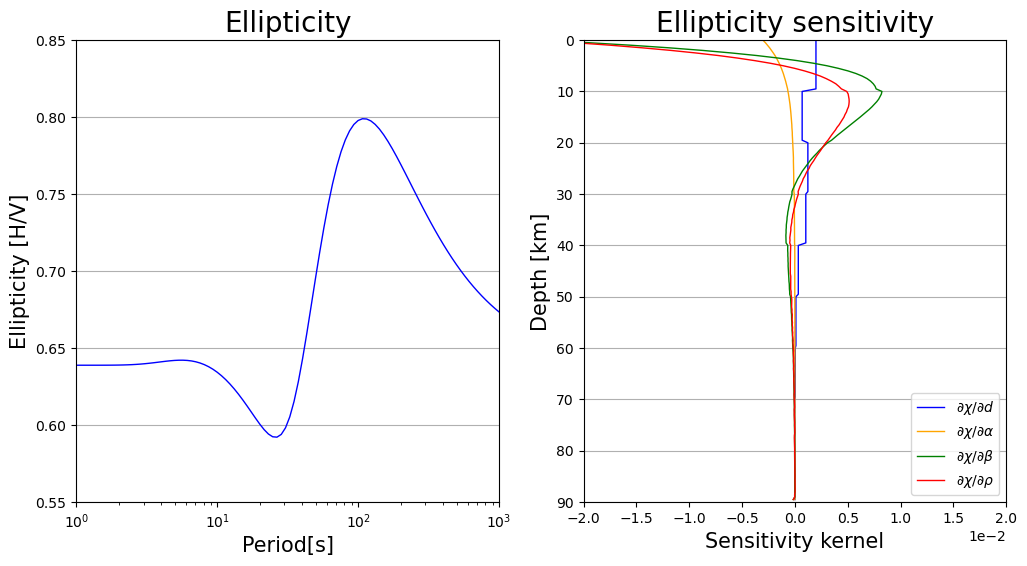

In [3]:
import numpy as np
from disba import Ellipticity, EllipticitySensitivity
import matplotlib
from matplotlib import pyplot as plt

from disba._helpers import resample

#velocity_model = numpy.array([
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 6.80, 3.40, 2.00],
#   [10.0, 7.00, 3.50, 2.00],
#   [10.0, 7.60, 3.80, 2.00],
#   [10.0, 8.40, 4.20, 2.00],
#   [10.0, 9.00, 4.50, 2.00],
#   [10.0, 9.40, 4.70, 2.00],
#   [10.0, 9.60, 4.80, 2.00],
#   [10.0, 9.50, 4.75, 2.00],
#])
#velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)

velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)
velocity_model_thickness=velocity_model.T[0]

## 0.1.对原始速度模型进行重采样
dz = 0.5
velocity_model = resample(velocity_model_thickness.T, velocity_model, dz)
velocity_model = np.array(velocity_model[1])
velocity_model.T[0] = dz

t = np.logspace(0.0, 3.0, 100)

ell = Ellipticity(*velocity_model.T)
#ell = Ellipticity(velocity_model_thickness,velocity_model_vp,velocity_model_vs,velocity_model_rho)
rel = ell(t, mode=0)
#print("rel=",rel)

# ell returns a namedtuple (period, ellipticity, mode)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
es = EllipticitySensitivity(*velocity_model.T)
#es = EllipticitySensitivity(velocity_model_thickness,velocity_model_vp,velocity_model_vs,velocity_model_rho)
#print("es=",es)
ek = [es(20.0, mode=0, parameter=parameter) for parameter in parameters]
#print("ek=",ek)

# es returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)

##开始画图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)

##1.Ellipticity
ax1.set_xlim(1,1000)
ax1.set_xscale("log")
ax1.set_xlabel("Period[s]",fontsize=15)
#ax1.xaxis.get_major_formatter().set_powerlimits((0,0))
ax1.set_ylim(0.55,0.85)
ax1.set_ylabel("Ellipticity [H/V]",fontsize=15)
ax1.grid(axis="y")
ax1.set_title("Ellipticity",fontsize=20)
ax1.plot(rel.period,rel.ellipticity,linewidth=1,color="blue")

##2.
ax2.set_xlim(-0.02,0.02)
ax2.xaxis.get_major_formatter().set_powerlimits((0,1))
ax2.set_xlabel("Sensitivity kernel",fontsize=15)
ax2.set_ylim(90,0)
ax2.set_ylabel("Depth [km]",fontsize=15)
ax2.grid(axis="y")
ax2.set_title("Ellipticity sensitivity",fontsize=20)
ax2.plot(ek[0].kernel,ek[0].depth,color="blue",linewidth=1,label=r'${\partial \chi}/{\partial d}$')
ax2.plot(ek[1].kernel,ek[1].depth,color="orange",linewidth=1,label=r'${\partial \chi}/{\partial \alpha}$')
ax2.plot(ek[2].kernel,ek[2].depth,color="green",linewidth=1,label=r'${\partial \chi}/{\partial \beta}$')
ax2.plot(ek[3].kernel,ek[3].depth,color="red",linewidth=1,label=r'${\partial \chi}/{\partial \rho}$')

ax2.legend(loc="lower right",fontsize=10)

#plt.show()
plt.savefig('4syn_ellipticity_ellipticitySensKer.png',dpi=300)
